<a href="https://colab.research.google.com/github/SWiwoo/CornStudy/blob/study/chapter2__%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지도 학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용하는 것

이런 입력/출력 샘플 데이터, 즉 훈련 세트로부터 머신러닝 모델을 만듦

목표 : 이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측

장점 : 훈련 데이터를 만드는 데 사람이 개입해 노력해야 하지만 자동화하면 힘들고 어려운 작업의 속도 향상

# 2.1 분류와 회귀

- 지도 학습에는 분류와 회귀가 있음
-> 분류 : 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측 
     ex) 이진 분류(Y/N, P/N), 다중 분류(붓꽃 분류)
-> 회귀 : 연속적인 숫자, 부동소수점수(실수)를 예측
     ex) 교육 수준, 나이 바탕으로 연간 소득 예측, 수확량 예측    

# 2.2 일반화, 과대적합, 과소적합

- 지도 학습에서는 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면 처음 보는 새로운 데이터가 주어져도 정확히 예측할 거라 기대함
- 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화 되었다고 함
- 너무 복잡한 모델을 만든다면 훈련세트에만 정확한 모델이 됨 = 과대적합
- 간단할 수록 일반화 되지만 너무 간단하면 = 과소적합
    

## 2.2.1 모델 복잡도와 데이터셋 크기의 관계

    모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관계
    데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있음
    같은 데이터 중복, 비슷한 데이터 모으는 것은 x
    데이터양의 힘을 과소평가 하지 말 것!

# 2.3 지도 학습 알고리즘

- 모델의 복잡도, 알고리즘 살펴보기
- 모델의 장단점 평가, 적절한 데이터 살펴보기
- 매개변수와 옵션 설명
- 분류와 회귀 모델을 모두 가지고 있는 알고리즘 
     

## 2.3.1

    두 개의 특성을 가진 forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋
    다음 코드는 이 데이터셋의 모든 데이터 포인트를 산점도로 그림

In [96]:
pip install mglearn

In [97]:
import mglearn                                        # 앞으로 이 책에서 임포트되었다고 가정할 라이브러리들
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [98]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)


X.shape: (26, 2)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0, flags=flags)


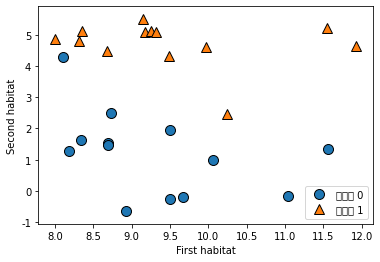

In [99]:
# 데이터셋을 만듭니다
X,y =mglearn.datasets.make_forge()

# 산점도를 그립니다
mglearn.discrete_scatter(X[:,0], X[:,-1], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel("First habitat")
plt.ylabel("Second habitat")
print("X.shape:", X.shape)

Text(0, 0.5, 'target')

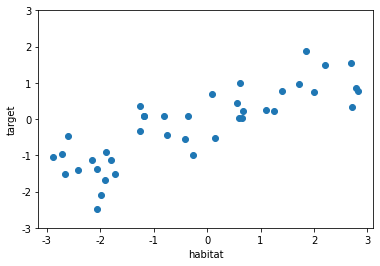

In [103]:
# 회귀 알고리즘 설명을 위해 wave 데이터셋 사용
# wave 데이터셋은 입력 특성 하나와 모델링할 타깃 변수를 가짐

X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('habitat')
plt.ylabel('target')

In [52]:
# 이번엔 위스콘신 유방함 데이터셋 사용해 보겠음

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print('cancer.keys():\n', cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [53]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [54]:
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})     #악성이 212, 양성이 357

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [55]:
# feature_names 속성을 확인하면 각 특성의 의미를 알 수 있음

print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [56]:
# 회귀 분석용 실제 데이터셋으로는 보스톤 주택가격 사용
# 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스톤 주택 평균 가격을 예측

from sklearn.datasets import load_boston
boston=load_boston()
print("데이터의 형태", boston.data.shape)


데이터의 형태 (506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [57]:
# 13개의 입력 특성뿐 아니라 특성끼리 곱하여(상호작용) 의도적으로 확장
# 범죄율 * 고속도로 접근성 도 특성으로 생각하는 것 -> "특성 공학(feature engineering)"

In [58]:
X,y=mglearn.datasets.load_extended_boston()
print('X.shape:', X.shape)      # 13개의 원래 특성에서 13개에서 2개씩 곱한 91개의 특성을 더해 총 104개

X.shape: (506, 104)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## k-최근접 이웃

- k-NN 알고리즘은 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
- 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 최근접 이웃을 찾음


### k-최근접 이웃 분류


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


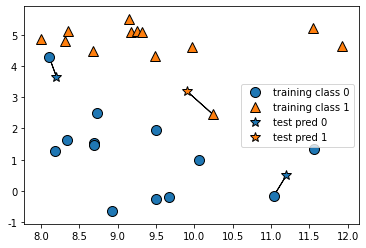

In [104]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

# "데이터 포인트" 3개를 추가(별 모양)
# 추가한 각 데이터 포인트에서 가장 가까운 훈련 데이터 포인트(training class)를 연결
# 1-최근접 이웃 알고리즘의 예측은 이 데이터 포인트의 레이블이 됨(같은 색으로 연결함)

    -가장 가까운 이웃 하나가 아니라 임의의 k 개를 선택할 수도 있음
    -이것을 k-최근접 이웃 알고리즘이라 함
    -둘 이상의 이웃을 선택할 때는 레이블을 정하기 위해 투표를 함
    -테스트 포인트 하나에 대해 클래스 0에 속한 이웃이 몇 개인지, 그리고 클래스 1에 속한 이웃이 몇 개인지를 셈
    -이웃이 더 많은 클래스를 레이블로 지정

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


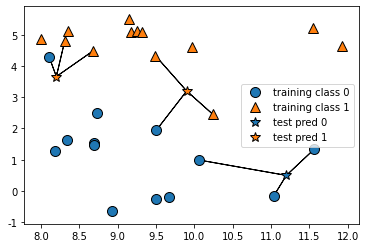

In [108]:
# 다음은 세 개의 최근접 이웃을 사용하는 예

mglearn.plots.plot_knn_classification(n_neighbors=3)

## 세 데이터 포인트 중 왼쪽 위의 것은 이웃을 하나만 사용했을 때와 예측이 달라진 것을 알 수 있음
## 클래스가 다수인 데이셋에도 같은 방법 적용 가능

▼scikit-learn을 사용해서 k-최근접 이웃 알고리즘을 어떻게 적용하는지 살펴보기

In [109]:
# 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눔

from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [110]:
# KNeighborsClassifier를 임포트 하고 객체를 만듦
# 이웃의 수(n_neighbors) 같은 매개변수들을 지정
# 여기서는 이웃의 수를 3으로 지정

from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

In [111]:
# 훈련 세트를 사용하여 분류 모델을 학습시킴
# KNeighborsClassifier에서 학습이란, 예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [112]:
# 테스트 데이터에 대해 predict 메서드를 호출해서 예측

print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [113]:
# 모델이 얼마나 잘 일반화되었는지 평가하기 위해 score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출

print("테스트 세트 정확도:{:.2f}". format(clf.score(X_test, y_test)))

## 모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측

테스트 세트 정확도:0.86


KNeighborsClassifier 분석

         - 2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy 평면에 그려볼 수 있음
         - 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠함
         - 알고리즘이 클래스 0과 1로 지정한 영역으로 나뉘는 "결정 경계"를 볼 수 있음
         - 다음 코드는 이웃이 하나, 셋, 아홉 개일 때의 결정 경계를 보여줌

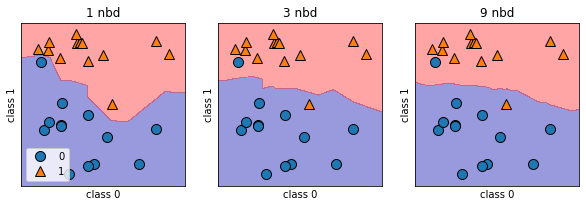

In [114]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):

    # fit 메서드는 self 객체를 반환한다.
    # 객체 생성과 fit 메서드를 한줄에 쓸 수 있따.

    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True, eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} nbd".format(n_neighbors))
    ax.set_xlabel("class 0")
    ax.set_ylabel("class 1")

axes[0].legend(loc=3)

- 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있음
- 이웃의 수를 늘릴수록 결정 경계는 더 부드러워짐
- 부드러운 경계=> 더 단순한 모델
- 이웃을 많이 사용할 수록 모델의 복잡도가 높아짐

- 모델의 복잡도와 일반화 사이의 관계 알아보기
- 유방암 데이터셋 사용

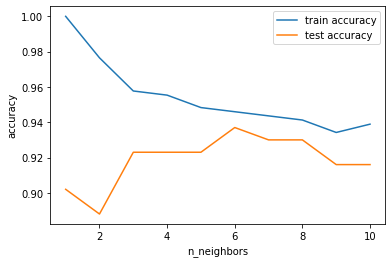

In [67]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66 )      ## X,y,stratify=y, random_state


training_accuracy =[]
test_accuracy=[]
# 1에서 10까지 n_neighbors를 적용
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings :
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()



- 위 그래프는 n_neighbors 변화에 따른 훈련 정확도와 테스트 정확도
- 과대적합과 과소적합의 특징을 확인 가능
- 이웃의 수가 적을수록 모델이 복잡해지므로 그래프가 수평으로 뒤집힌 형태
- 최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽 & 테스트 정확도 낮음
- 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어듦 -> 이웃의 수 적은 모델은 너무 복잡함 & 정확도 낮음
- 이웃의 수가 10개일 때는 모델이 너무 단순하여 정확도 더 나빠짐
- 정확도가 가장 좋을 때는 중간 정도인 6개를 사용하였을 때


## k-최근접 이웃 회귀
- 회귀 분석에도 쓰임
- wave 데이터셋을 이용해서 이웃이 하나인 최근접 이웃 시도
- x축에 세개의 테스트 데이터를 흐린 별 모양으로 표시

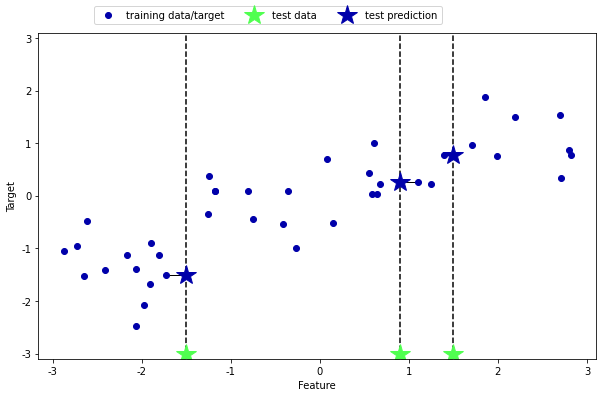

In [68]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

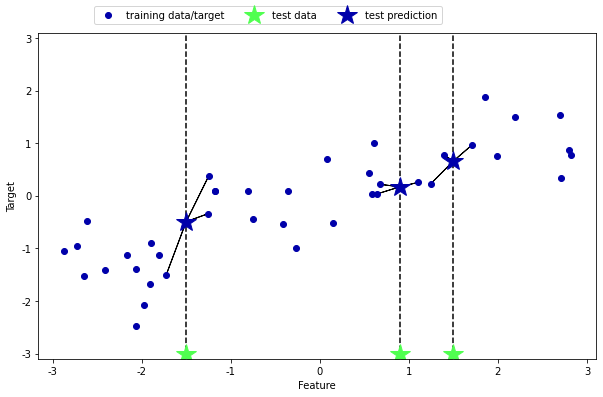

In [69]:
# 여러 개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측이 됨

mglearn.plots.plot_knn_regression(n_neighbors=3)

In [70]:
# scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 KNeighborsRegressor에 구현되어 있음

from sklearn.neighbors import KNeighborsRegressor
X, y=mglearn.datasets.make_wave(n_samples=40)

In [71]:
# wave 데이터셋을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듦
reg=KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킴
reg.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=3)

In [72]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [73]:
# score 메서드를 이용해 모델을 평가할 것
# 회귀일 땐 score 메서드는 R^2 (결정계수, 보통 0과 1사이의 값)값을 반환함
# 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우
# R^2가 음수인 경우 = 예측과 타깃이 상반된 경향을 가지는 경우

print("테스트 세트 : R^2 : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 : R^2 : 0.83


## KNeighborsRegressor 분석
- 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측해 볼 수 있음
- 이를 위해 x축을 따라 많은 포인트를 생성해 테스트 데이터셋을 만듦

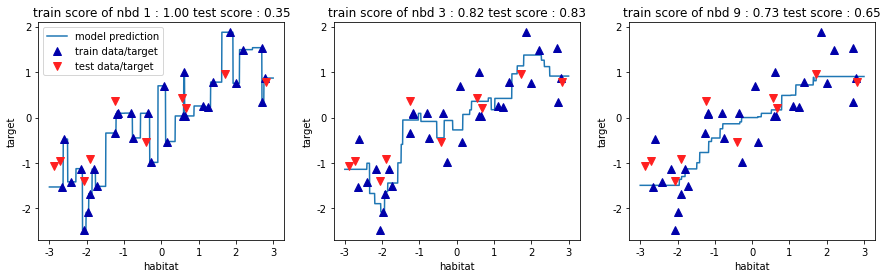

In [74]:
fig, axes=plt.subplots(1,3,figsize=(15,4))

# -3 과 3 사이에 1,000개의 데이터 포인트를 만듦

line=np.linspace(-3,3,1000).reshape(-1,1)


for n_neighbors, ax in zip([1,3,9], axes):
  # 1,3,9 개의 이웃을 사용한 예측을 함
  reg=KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)

  ax.set_title( 
      "train score of nbd {} : {:.2f} test score : {:.2f}".format(
          n_neighbors, reg.score(X_train, y_train),
           reg.score(X_test, y_test)))
  ax.set_xlabel("habitat")
  ax.set_ylabel("target")

axes[0].legend(["model prediction", "train data/target", "test data/target"], loc="best")  
  

- 위 그림에서 볼 수 있듯이 이웃을 하나만 사용하면 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지남
- 매우 불안정한 예측-> 이웃을 더 사용하면 안정된 예측 나옴



## 장단점과 매개변수

      - KNeighbors 분류기에 중요한 매개변수 : 데이터 포인트 사이의 거리, 이웃의 수
      - 보통 이웃의 수는 3~5개로 하지만, 적절한 조정 필요
      - 거리 재는 방법은 보통 유클리디안 거리 방식 사용
      - k-NN은 이해하기 쉬운 모델이라는 장점
      - 매우 빠르게 만들 수 있으나 특성이나 샘플의 수가 크면 예측이 느려짐
      - 전처리가 매우 중요한 알고리즘
      - 특성 값 대부분이 0인 데이터셋과는 잘 작동하지 않음
      - biggest shortcoming : 예측이 느리고 특성이 많을 시 처리 능력 부족함


## 2.3.3 선형 모델

- 입력 특성에 대한 선형 함수를 만들어 예측 수행

### 회귀의 선형 모델
     일반화된 예측 함수  ^y=w[0] X x[0] + w[1] X x[1] +...+ w[p] X x[p] + b
     이 식에서 x[0]부터 x[p]까지는 하나의 데이터 포인트에 대한 특성을 나타냄(특성의 개수는 p+1)
     w와 b는 모델이 학습할 파라미터
     ^y는 모델이 만들어낸 예측값
     특성이 많아지면 w는 각 특성에 해당하는 기울기를 각각 가짐
     예측값은 입력 특성에 w의 각 가중치를 곱해서 더한 가중치 합
     


w[0]: 0.393906  b: -0.031804


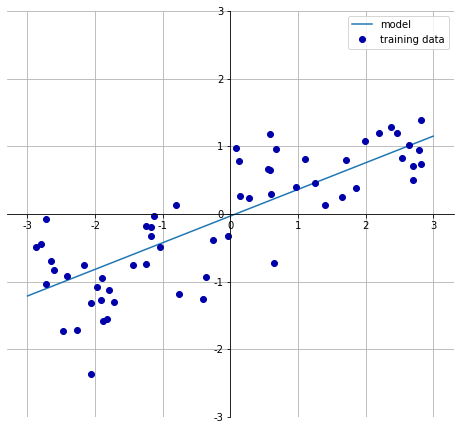

In [75]:
# 1차원 wave 데이터셋으로 파라미터 w[0]와 b를 직선처럼 되도록 학습시켜 볼 것

mglearn.plots.plot_linear_regression_wave()

    - 직선을 사용한 예측은 제약이 많음
    - 데이터의 상세 정보를 잃음
    - 타깃 y가 특성들의 선형 조합이라는 가정은 과함
    - 특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 가짐
    - 훈련 데이터보다 특성이 더 많은 경우엔(무수히 많은 해를 가지는 선형 방정식) 어떤 타깃 y도 훈련 세트에 대해서 선형 함수로 모델링할 수 있음
    
    - 회귀를 위한 선형 모델들은 훈련 데이터로부터 모델 파라미터 w와 b를 학습하는 방법과, 모델의 복잡도를 제어하는 방법에서 차이가 남


## ▶ 회귀에서 가장 인기 있는 선형 모델들을 살펴보기


## 선형 회귀(최소제곱법/ols)

- 선형 회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차mse를 최소화하는 w와 b를 찾음
- mse는 예측값과 타깃 값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것
- 선형 회귀는 매개변수가 없음<->모델의 복잡도를 제어할 방법이 없음

In [76]:
from sklearn.linear_model import LinearRegression
X, y=mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr=LinearRegression().fit(X_train, y_train)

In [77]:
# 기울기 파라미터 w 는 가중치 또는 계수라고 하며 lr 객체의 coef_ 속성에 저장되어 있고
# 편향또는 절편 파라미터 b는 intercept_ 속성에 저장되어 있음

print("lr.coef_:", lr.coef_)                   # coef_뒤의 밑줄 :  scikit-learn은 훈련 데이터에서 유도된 속성은 끝에 밑줄 붙임, 지정 매개변수와 구분하기 위함
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [78]:
# intercept_속성은 항상 실수 값 하나이지만, coef_속성은 각 입력 특성에 하나씩 대응되는 numpy array 
# wave 데이터셋에는 입력 특성이 하나뿐임 -> lr.coef_도 원소 하나

# 훈련 세트와 테스트 세트의 성능을 확인

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


      - R^2의 값이 0.66인 것은 좋은 결과가 아님
      - 그러나 훈련 세트와 테스트 세트의 점수가 매우 비슷
      - 이는 과대적합이 아닌 과소적합인 상태를 의미
      - 1차원 데이터셋에서는 모델이 단순하므로 과대적합을 걱정할 필요가 없음
      - 고차원 데이터셋(특성이 많은)에서는 선형 모델의 성능이 매우 높아져 과대적합될 가능성이 높음

In [79]:
# 복잡한 데이터셋에서 선형 모델 시험
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X, y= data, target


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr=LinearRegression().fit(X_train, y_train)

In [80]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1012 non-null   float64
 1   1       1012 non-null   float64
 2   2       1012 non-null   float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
dtypes: float64(11)
memory usage: 87.1 KB


In [81]:
# 훈련 세트와 테스트 세트의 점수를 비교하면, 훈련 세트에서는 예측 꽤 정확, 테스트 세트에서는 R^2값이 매우 낮음
# extended boston 데이터 못 써서 그럼

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


## 리지 회귀

- 가중치 w 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 **추가 제약 조건**을 만족시키기 위한 목적도 있음
-  추가 제약 조건 : 가중치의 절댓값을 가능한 작게 만듦 -> w의 모든 원소가 0에 가깝게 되길 바람
- 모든 특성이 출력에 주는 영향을 최소한으로 함(기울기를 작게 만듦)=> 규제
- **규제** : 과대적합이 되지 않도록 모델을 강제로 제한
- 리지 회귀에서 사용하는 규제 방식을 **L2 규제**라고 함

In [82]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.77
테스트 세트 점수: 0.63



- 데이터셋이 달라서 책이랑 반대임 ㅜㅜ
- 어쨌든 하고 싶은 말은
- 릿지는 선형 회귀보다 덜 자유로운 모델이기 때문에 **과대적합 적어짐**
- 모델의 **복잡도가 낮아지면** 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 됨=> 릿지모델이 좋다

- 릿지는 **모델을 단순하게** (계수를 0에 가깝게)해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공
- 사용자는 **alpha 매개변수**로 훈련 세트의 성능 대비 모델을 얼마나 **단순화**할지를 지정할 수 있음
- 예제에서는 매개변수의 기본값인 alpha=0.1을 사용함
- 이는 최적의 값은 아님, 최적의 alpha값은 사용하는 데이터셋에 달림
- alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련 세트의 성능은 나빠지지만 일반화에는 도움이 됨

In [83]:
ridge10=Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

## 아 자꾸 점수 내려간다..

훈련 세트 점수: 0.76
테스트 세트 점수: 0.61


    alpha값을 줄이면 계수에 대한 제약(=규제=모델의 단순성)이 풀림(모델이 복잡해짐)
    alpa값을 아주 작게 설정하면 계수를 거의 제한하지 않으므로 LinearRegression모델과 거의 같아짐

In [84]:
ridge01=Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.77
테스트 세트 점수: 0.63


In [85]:
# alpha=0.1이 꽤 좋은 성능을 냄=> 규제 풀고 복잡도 허용하자 좋은 성능
# 테스트 세트에 대한 성능이 높아질 때까지 alpha값 줄여나가면 됨
# alpha와 모델 복잡도는 반비례(alpha가 10이면 단순성이 10만큼!!, )

alpha_train_score = []

alpha_test_score = []

alpha_set = [0.1, 1 ,10]



for i in alpha_set:

    ridge=Ridge(alpha=i)

    ridge.fit(X_train, y_train)



    ridge_tr_score = round(ridge.score(X_train, y_train), 3)

    ridge_te_score = round(ridge.score(X_test, y_test), 3)



    alpha_train_score.append(ridge_tr_score)

    alpha_test_score.append(ridge_te_score)



print(alpha_set)
print(alpha_train_score)
print(alpha_test_score)


[0.1, 1, 10]
[0.77, 0.768, 0.762]
[0.634, 0.627, 0.613]


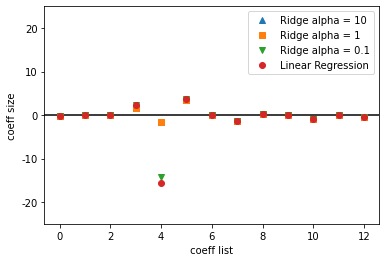

In [86]:
# alpha값에 따라 모델의 coef_속성이 달라짐
# 높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_의 절댓값 크기가 작을 것

plt.plot(ridge10.coef_, "^", label="Ridge alpha = 10")
plt.plot(ridge.coef_, "s", label="Ridge alpha = 1")
plt.plot(ridge01.coef_, "v", label="Ridge alpha = 0.1")

plt.plot(lr.coef_, "o", label="Linear Regression")
plt.xlabel(" coeff list ")
plt.ylabel(" coeff size ")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

    위 그림에서 x축은 coef_의 원소를 위치대로 나열 한 것
    x=0은 첫 번째 특성에 연관된 계수, x=1은 두 번째 특성에 연관된 계수ㅜ
    y축은 각 계수의 수치
    alpha가 10일 때 계수들은 대부분 (-3,3)에 속함
    alpha가 작아질 수록 계수는 커지며 그림 밖으로 나감

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

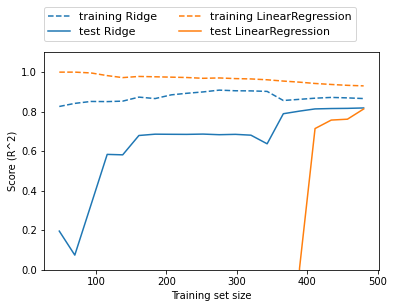

In [87]:
# 규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것

# 다음은 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 LinearRegression과 Ridge(alpha=1)을 적용한 것
# (데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습곡선이라고 함 "learning curve" )

mglearn.plots.plot_ridge_n_samples()

- 예상대로 모든 데이터셋에 대해 릿지와 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높음
- 릿지에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮음
- 그러나 테스트 데이터에서는 릿지의 점수가 더 높고, 
- 특별히 작은 데이터셋에서는 더 그러함
- 데이터셋 크기가 400 미만일 때 선형 회귀는 어떤 것도 학습하지 못하고 있음


=> 데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아질 것

=> 선형 회귀의 훈련 데이터 성능이 감소하고 있음

=> 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문

## Lasso 라소

- 선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso 가 있음
- 릿지와 마찬가지로 라소도 계수를 0에 가깝게 만들려고 함
- 방식이 조금 다르기 때문에 L1 규제라고 함
- L1 규제의 결과로 라소를 사용할 때 어떤 계수는 0이 되기도 함
- 모델에서 아예 제외되는 특성이 생긴다는 뜻
- **특성 선택**(feature selection)이 자동으로 이뤄짐

In [88]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train, y_train)
print(" 훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print(" 테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print(" 사용한 특성의 개수 :", np.sum(lasso.coef_ !=0) )

 훈련 세트 점수 : 0.72
 테스트 세트 점수 : 0.55
 사용한 특성의 개수 : 11


In [89]:
# 일단 결과 별로임
# 릿지와 마찬가지로 라소도 계수를 얼마나 강하게 0으로 보낼지를 조절하는 alpha 매개변수를 지원
# 지금은 기본값인 1 사용, 과소적합을 줄이기 위해 alpha값을 줄여볼 것임
# 이렇게 하려면 max_iter(반복 시행하는 최대 횟수)의 기본값을 늘려야 함

# max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생함

lasso001=Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print(" 테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print(" 사용한 특성의 개수 :", np.sum(lasso001.coef_ !=0) )

훈련 세트 점수: 0.77
 테스트 세트 점수 : 0.63
 사용한 특성의 개수 : 13


In [90]:
# alpha 값을 낮추면 모델의 복잡도는 증가하여 훈련 세트와 테슽 세트에서 성농 좋아짐
# 릿지보다 낫긴 하지만 사용된 특성은 여전히 적음-> 모델 분석하기 더 쉬움
# alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해짐

lasso00001=Lasso(alpha=0.00001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print(" 테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print(" 사용한 특성의 개수 :", np.sum(lasso00001.coef_ !=0) )

훈련 세트 점수: 0.77
 테스트 세트 점수 : 0.64
 사용한 특성의 개수 : 13


Text(0, 0.5, 'coeff size')

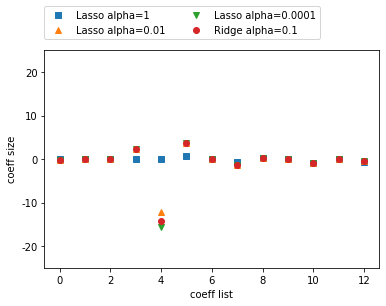

In [91]:
plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coeff list")
plt.ylabel("coeff size")

alpha=1 일 때 계수 대부분이 0일 뿐만 아니라 나머지 계수들도 크기가 작다는 것을 알 수 있음

alpha를 0.01로 줄이면 대부분의 특성이 0이 되는 분포를 얻게 됨

alpha=0.0001이 되면 계수 대부분이 0이 아니고 값도 커져 규지를 덜 받은 모델이 됨

alpha=0.1인 릿지 모델은 alpha=0.01인 라소 모델과 성능이 비슷, 그러나 릿지를 사용하면 어떤 계수도 0이 되지 않는다는 특징!!

실제로 두 모델 중 보통은 릿지 회귀를 선호

그러나 특성이 많고 그중 일부분만 중요하다면 라소가 더 좋음

분석하기 쉬운 모델을 원한다면 라소가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만듦

scikit-learn은 라소와 릿지의 패널티를 결합한 ElasticNet을 제공-> 최상의 성능이지만 L1,L2규제를 위해 매개변수 두 개를 조정해야 함



## 분류용 선형 모델

- 선형 모델은 회귀뿐 아니라 분류에도 쓰임
- 이진 분류 : ^y = w[0] X x[0] + w[1] X x[1] + ..+ w[p] X x[p] + b >0
- 선형 회귀와 아주 비슷하지만, 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교
- 합수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측, 0보다 크면 +1로 예측
- 여기서도 계수 w와 절편 b를 찾기 위한 방법이 많이 있음
- 회귀용 선형 모델에서는 출력 **^y**이 특성의 선형 함수, 즉 직선, 평면, 초평면이 선형 함수
- 분류용 선형 모델에서는 **결정 경계**가 입력의 선형 함수 

- => (이진) 선형 분류기에서는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류 

- 선형 모델을 학습시키는 알고리즘은 두 방법으로 구분 
    - 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
    - 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

- 두 개의 선형 분류 알고리즘
    - 로지스틱 회귀(linear_model.LogisticRegression에 구현됨)
    - 서포트 벡터 머신(svm.LinearSVC)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


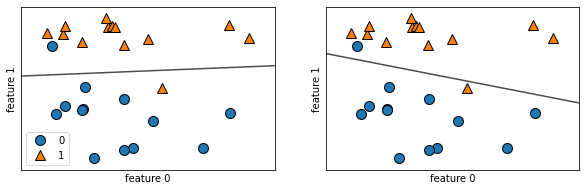

In [116]:
# forge 데이터셋을 사용하여 LogisticRegression과 LinearSVC 모델을 만들고 이 선형 모델들이 만들어낸 결정 경계를 그림으로 나타낼 것

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
  clf=model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
  ax.set_xlabel('feature 0')
  ax.set_ylabel("feature 1")
axes[0].legend()


    1. 위 그림은 LinearSVC와 LogisticRegression으로 만든 결정 경계가 직선으로 표현되었고 위쪽은 클래스1, 아래쪽은 클래스0으로 나누고 있음
    2. 새로운 데이터가 이 직선 위쪽에 놓이면 클래스 1로 분류될 것이고 반대로 직선 아래쪽에 놓이면 클래스 0으로 분류될 것
    3. 두 모델은 비슷한 결정 경계를 만들었고 포인트 두개를 잘못 분류함
    4. 릿지와 마찬가지로 이 두 모델은 기본적으로 L2 규제를 사용
    5. LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C
    6. 매개변수로 높은 C값을 지정하면 훈련 세트에 가능한 최대로 맞추려 하고, C값을 낮추면 모델은 계수 벡터w를 0에 가까워지도록 만듦(규제 증가)
    7. 다시 말해, 알고리즘은 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확히 분류하려고 노력함




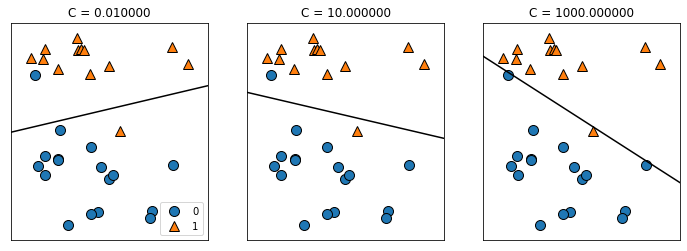

In [117]:
# LinearSVC를 사용한 예

mglearn.plots.plot_linear_svc_regularization()

     왼쪽 그림은 아주 작은 C값 때문에 규제가 많이 적용됨
     클래스 0의 대부분은 아래에 있고, 1은 대부분 위에 있음
     규제가 강해진 모델은 비교적 수평에 가까운 결정 경계를 만들었고 잘못 분류한 데이터 포인트는 두개
     중간 그림은 C값이 조금 더 크며 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어졌음
     오른쪽 그림에서 C값을 아주 크게 하였더니 결정 경계는 더욱 기울었고 마침내 클래스 0의 모든 데이터 포인트를 올바로 분류
     오른쪽 그림의 모델은 모든 데이터 포인트를 정확하게 분류하려고 애썼지만 클래스의 전체적인 배치를 잘 파악하지 못함=> 오른쪽 모델은 **과대적합**

In [118]:
# 회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이어서 매우 제한적인 것처럼 보임
# but 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며, 특성이 많아지면 과대적합되지 않도록 하는 것이 매우 중요

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
                                                    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
logreg=LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

## 기본값 C=1이 훈련 세트와 테스트 세트 양쪽에 정확도 95%로 꽤 훌륭한 성능을 내고 있음
## 그러나 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로 과소적합인 것 같음

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


In [119]:
# 모델의 제약을 더 풀어주기 위해 C를 증가시킴

logreg100=LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

## C=100을 사용하니(규제 풀림) 훈련 세트의 정확도가 높아졌고 테스트 세트의 정확도고 조금 증가
## 이는 복잡도가 높은 모델일수록 성능이 좋음을 말해줌

훈련 세트 점수 : 0.981
테스트 세트 점수 : 0.965


In [120]:
# 이번엔 규제를 더욱 강하게 하여 C=0.01을 사용함

logreg001=LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


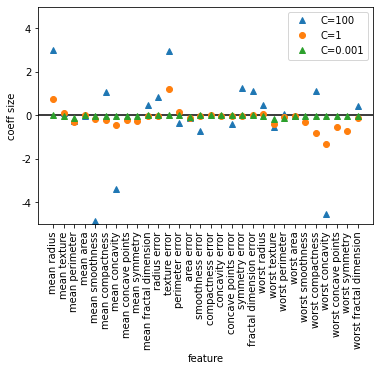

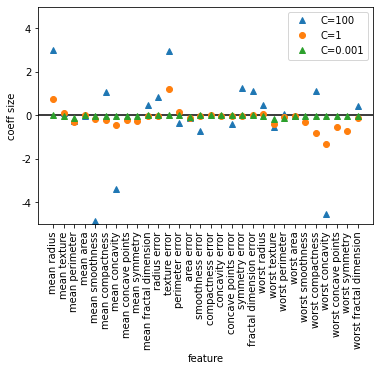

In [122]:
plt.plot(logreg100.coef_.T,"^", label="C=100")
plt.plot(logreg.coef_.T,"o", label="C=1")
plt.plot(logreg001.coef_.T,"^", label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("feature")
plt.ylabel("coeff size")
plt.legend()

### NOTE

- LogisticRegression은 기본으로 L2 규제를 적용하므로 릿지와 비슷
- 규제를 강하게 할수록 계수들은 0에 더 가깝게 만들지만 완전히 0이 되지는 않음
- mean_perimeter는 c=100,c=1일 때 이 계수는 음수인데, c=0.001일때는 양수가 되어 c=1일 때보다 절대값이 더 큼
- 해석하자면, 계수가 클래스와 특성의 연광성을 알려주는 것임
- 예를 들어, 높은 texture error 특성은 악성인 샘플과 관련이 깊음, 그러나 mean perimeter 계수의 부호가 바뀌는 것으로 보아 높은 mean perimeter값은 양성이나 악성의 신호 모두가 가능
-  그래서 선형 모델의 계수는 항상 의심하고 조심해서 해석해야 함

C=0.001인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001인 l1 로지스틱 회귀의 훈련 정확도 : 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.98


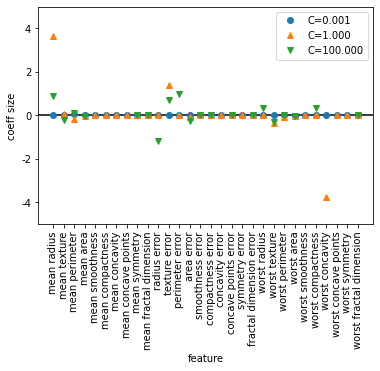

In [126]:
# 더 쉬운 모델을 원한다면 L1규제를 사용하는 것이 좋음
# 다음은 L1규제를 사용할 때의 분류 정확도와 계수 그래프

for C, marker in zip([0.001, 1, 100], ["o", "^", "v"]):
  lr_l1=LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
  print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
  print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))


plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("feature")
plt.ylabel("coeff size")

plt.ylim(-5,5)
plt.legend(loc="best")

    - 위에서 볼 수 있듯이, 이진 분류에서의 선형 모델과 회귀에서의 선형 모델 사이에는 유사점이 많음
    - 회귀에서처럼, 모델들의 주요 차이는 규제에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 penalty 매개변수임

## 다중 클래스 분류용 선형 모델

- 로지스틱 회귀만 제외하고 많은 선형 분류 모델은 태생적으로 이진분류만을 지원(다중 클래스 지원하지 않음)
- 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 방법 :  일대다 방법
- 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킴
- 클래스의 수만큼 이진 분류 모델이 만들어짐
- 예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택
- 클래스별 이진 분류기를 만들면 각 클래스가 계수 벡터 w와 절편 b를 하나씩 갖게 됨
- 분류 신뢰도를 나타내는 다음 공식의 결괏값이 가장 높은 클래스가 해당 데이터의 클래스 레이블로 할당됨
-  w[0] X x[0] + w[1] X x[1] +...+  w[p] X x[p] + b


[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]
 [ 3.64934251  1.40687195]
 [-2.17793419  9.98983126]
 [ 4.42020695  2.33028226]
 [ 4.73695639  2.94181467]
 [-3.6601912   9.38998415]
 [-3.05358035  9.12520872]
 [-6.65216726 -5.57296684]
 [-6.35768563 -6.58312492]
 [-3.6155326   7.8180795 ]
 [-1.77073104  9.18565441]
 [-7.95051969 -6.39763718]
 [-6.60293639 -6.05292634]
 [-2.58120774 10.01781903]
 [-7.76348463 -6.72638449]
 [-6.40638957 -6.95293851]
 [-2.97261532  8.54855637]
 [-6.9567289  -6.53895762]
 [-7.32614214 -6.0237108 ]
 [-2.14780202 10.55232269]
 [-2.54502366 10.57892978]
 [-2.96983639 10.07140835]
 [ 3.22450809  1.55252436]
 [-6.25395984 -7.73726715]
 [-7.85430886 -6.09302499]
 [-8.1165779  -8.20056621]
 [-7.55965191 -6.6478559 ]
 [ 4.93599911  2.23422496]
 [ 4.44751787  2.27471703]
 [-5.72103161 -7.70079191]
 [-0.92998481  9.78172086]
 [-3.10983631  8.72259238]
 [-2.44166942  7.58953794]
 

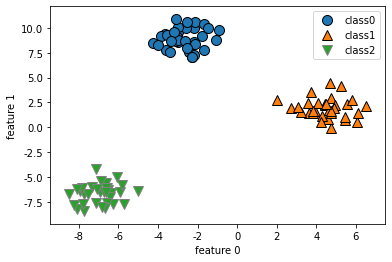

In [130]:
# 세 개의 클래스를 가진 간단한 데이터셋에 일대다 방식을 적용해볼 것
# 이 데이터셋은 2차원이며 각 클래스의 데이터는 정규분포를 따름

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
print(X,y)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class0", "class1", "class2"])


In [131]:
# 이 데이터셋으로 LinearSVC 분류기를 훈련

linear_svm=LinearSVC().fit(X,y)
print("계수 배열의 크기:", linear_svm.coef_.shape)
print("절편 배열의 크기:", linear_svm.intercept_.shape)

## coef_배열의 크기는 (3,2), 행은 세개의 클래스에 각각 대응하는 계수 벡터를 담고 있으며, 열은 각 특성에 따른 계수 값을 가지고 있음(이 경우 두 개)
## intercept_는 각 클래스의 절편을 담은 1차원 벡터

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


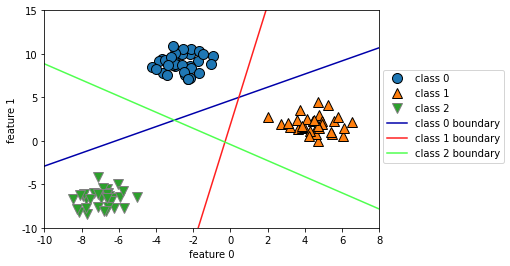

In [132]:
# 세 개의 이진 분류기가 만드는 경계를 시각화

mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], loc=(1.01, 0.3))  

    1. 훈련 데이터의 클래스 0에 속한 모든 포인트는 클래스 0을 구분하는 직선 위에, 즉 이진 분류기가 만든 클래스 0 지역에 있음
    2. 이 영역의 어떤 포인트든 최종 분류기는 클래스0으로 분류
    3. 클래스 0 분류 신뢰도 공식의 결과는 0보다 크고 다른 두 클래스의 경우는 0보다 작음
    4. 그림 중앙의 삼각형 영역 : 세 분류기 모두 나머지로 분류
    5. 이 곳의 데이터 포인트는 가장 가까운 직선의 클래스가 될 것


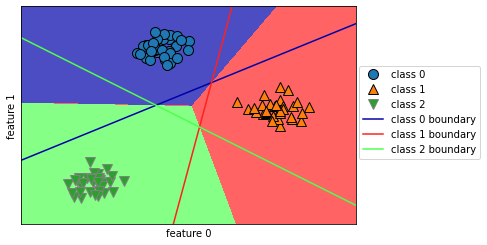

In [133]:
# 다음 예는 2차원 평면의 모든 포인트에 대한 예측 결과

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], loc=(1.01, 0.3))  

### 장단점과 매개변수

     1. 선형 모델의 주요 매개변수는 회귀에서는 alpha 였고, 
     2. LinearSVC와 LogisticRegression에서는 C
     3. alpha값이 클수록, C값이 작을수록 : 모델 단순화
     4. 보통 C와 alpha는 로그 스케일(10배씩 변경한다는 뜻)로 최적치를 정함
     5. 그리고 L1,L2 중 하나를 정해야 함
     6. 중요한 특성이 많지 않다면 L1, 기본적으로는 L2
     7. L1 규제는 모델의 해석이 중요한 요소일 때도 사용(몇가지 특성만 사용하므로 해당 모델에 중요한 특성이 무엇이고 그 효과가 어느 정도인지 설명하기 쉬움)
     8. 선형 모델은 학습 속도 빠르고 예측 빠름 & 매우 큰 데이터셋이나 희소한 데이터셋에서도 잘 작동
     9. 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본 설정 보다 빨리 처리하도록, solver='sag' 옵션을 줌
     10. 다른 대안으로 선형 모델의 대용량 처리 버전으로 구현된 SGDClassifier와  SGDRegressor 를 사용할 수 있음
     11. 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동함
